# Exercise 4
In this exercise you will use the sign language dataset from Kaggle and attempt to build a multi-class classifier to recognize sign language.



In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
#Get dataset
def get_data(filename):
    with open(filename) as training_file:
        rows = csv.reader(training_file, delimiter=',')
        headers = next(rows)
        labels = []
        images = []
        for row in rows:
            labels.append(int(row[0]))
            img = row[1:]
            images.append(np.array_split([float(x) for x in img],28))
            
        labels = np.array(labels)
        images = np.array(images)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Train ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest',
                                   horizontal_flip=True,
                                   rescale=1/255)

#Test ImageDataGenerator without Image Augmentation
validation_datagen = ImageDataGenerator(rescale=1/255)

train_gen = train_datagen.flow(training_images,
                               training_labels,
                               batch_size=32)

val_generator = validation_datagen.flow(testing_images,
                                        testing_labels,
                                        batch_size=32)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_gen,
                              epochs=10,
                              validation_data=val_generator)

model.evaluate(testing_images, testing_labels)

Epoch 1/10
858/858 [==============================] - 74s 87ms/step - loss: 2.7303 - accuracy: 0.1741 - val_loss: 1.9855 - val_accuracy: 0.3682
Epoch 2/10
858/858 [==============================] - 72s 84ms/step - loss: 2.0062 - accuracy: 0.3674 - val_loss: 1.4901 - val_accuracy: 0.4835
Epoch 3/10
858/858 [==============================] - 71s 83ms/step - loss: 1.5599 - accuracy: 0.4936 - val_loss: 0.9583 - val_accuracy: 0.6555
Epoch 4/10
858/858 [==============================] - 77s 89ms/step - loss: 1.2628 - accuracy: 0.5855 - val_loss: 0.6257 - val_accuracy: 0.7777
Epoch 5/10
858/858 [==============================] - 73s 85ms/step - loss: 1.0565 - accuracy: 0.6537 - val_loss: 0.6295 - val_accuracy: 0.7777
Epoch 6/10
858/858 [==============================] - 74s 86ms/step - loss: 0.9112 - accuracy: 0.6958 - val_loss: 0.5137 - val_accuracy: 0.8189
Epoch 7/10
858/858 [==============================] - 74s 86ms/step - loss: 0.8061 - accuracy: 0.7326 - val_loss: 0.3668 - val_accuracy:

[298.50180644318834, 0.51059675]

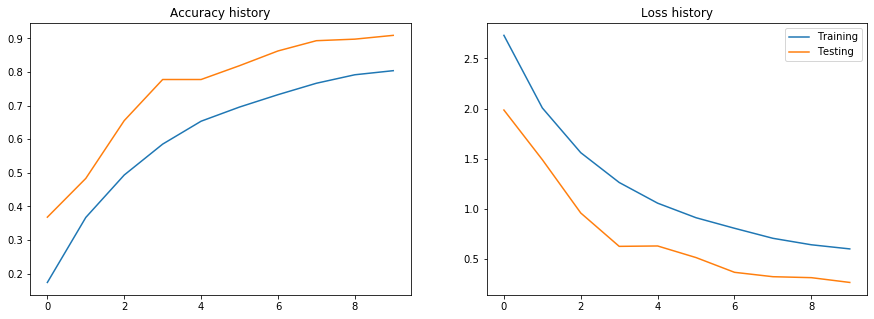

In [8]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(ncols = 2,figsize=(15,5))
ax[0].plot(history.history['accuracy'],label='Training')
ax[0].plot(history.history['val_accuracy'],label='Testing')
ax[0].set_title('Accuracy history')
ax[1].plot(history.history['loss'],label='Training')
ax[1].plot(history.history['val_loss'],label='Testing')
ax[1].set_title('Loss history')
plt.legend()
plt.show()